In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import plotly.express as px


import os
from langchain.embeddings.openai import OpenAIEmbeddings
import tiktoken

In [2]:
all_data = pd.read_csv("./steps_vars_term_str.csv", delimiter=',')
terms_list = all_data['vars_terms'].tolist()

In [5]:
os.environ["OPENAI_API_KEY"] = "you api key"

embed_model = OpenAIEmbeddings(model="text-embedding-3-large")

In [6]:
len(embed_model.embed_query(terms_list[1]))

3072

In [7]:
embed_model.model

'text-embedding-3-large'

In [8]:
enc_tiktoken = tiktoken.encoding_for_model("text-embedding-3-large")
total_tokens = 0
for term in terms_list:
    total_tokens += len(enc_tiktoken.encode(term))

print(f"Total term tokens: {total_tokens}")

Total term tokens: 782819


In [9]:
embeddings_df = pd.DataFrame(columns=[f"{inx}" for inx in range(3072)])

for term in tqdm(terms_list):
    term_embedding = embed_model.embed_query(term)
    embeddings_df = pd.concat([embeddings_df, pd.DataFrame({f"{inx}": [emb_num, ] for inx, emb_num in enumerate(term_embedding)})], ignore_index=True)


  0%|          | 0/4282 [00:00<?, ?it/s]C:\Users\voldo\AppData\Local\Temp\ipykernel_9684\1741175183.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  embeddings_df = pd.concat([embeddings_df, pd.DataFrame({f"{inx}": [emb_num, ] for inx, emb_num in enumerate(term_embedding)})], ignore_index=True)
100%|██████████| 4282/4282 [52:52<00:00,  1.35it/s]   


In [10]:
embeddings_df.to_csv("./term_openai_embedding-3-large.csv", index=False)

In [11]:
class_RI_LO = ["RI = LO" if los == ris else "RI < LO" if ris < los else "LO < RI" for los, ris in zip(all_data["LO_steps_num"].tolist(), all_data["RI_steps_num"].tolist())]

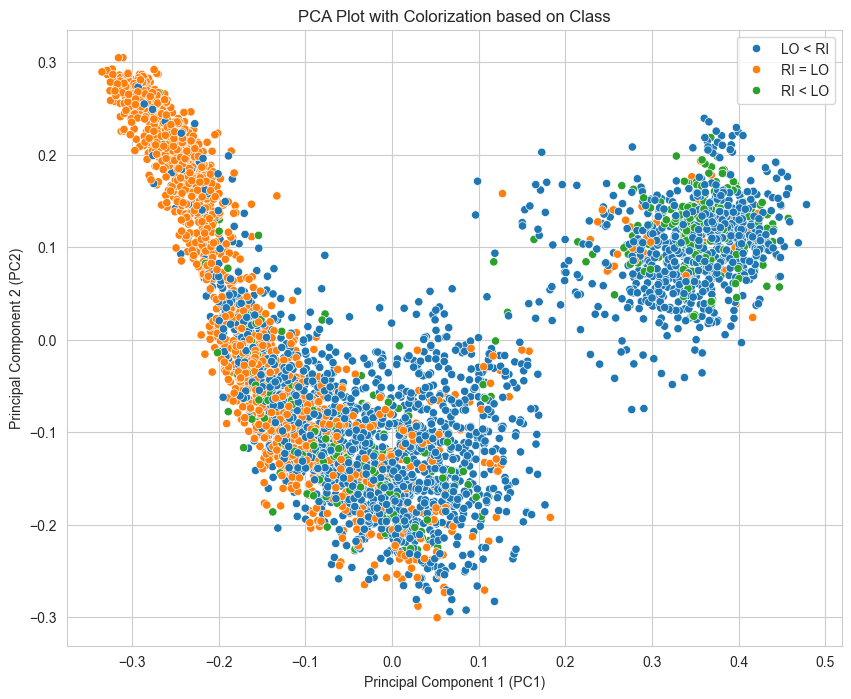

In [12]:
pca = PCA(n_components=2)  # Set the number of components as needed
principal_components = pca.fit_transform(embeddings_df)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = class_RI_LO

# Plot the PCA results with colorization based on the 'class' column
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,)
plt.title('PCA Plot with Colorization based on Class')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

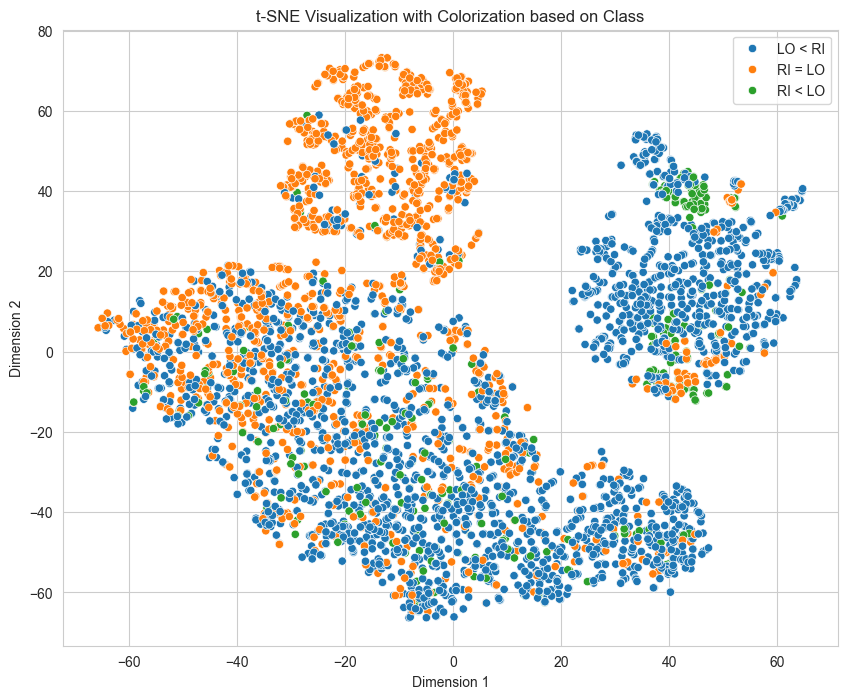

In [13]:
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(embeddings_df)

tsne_df = pd.DataFrame(data=embedded_data, columns=['Dimension 1', 'Dimension 2'])
tsne_df['class'] = class_RI_LO

# Plot the PCA results with colorization based on the 'class' column
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='class', data=tsne_df,)
plt.title('t-SNE Visualization with Colorization based on Class')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [14]:
pca_3d = PCA(n_components=3)  # Set the number of components as needed
principal_components_3d = pca_3d.fit_transform(embeddings_df)

pca_df_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['class'] = class_RI_LO

fig = px.scatter_3d(
    pca_df_3d, x='PC1', y='PC2', z='PC3',
    color='class', title="PCA 3D Visualization",
)

fig.update_traces(marker=dict(size=2))

# Show the plot
fig.show()

In [15]:
tsne_3d = TSNE(n_components=3, random_state=42)
embedded_data_3d = tsne_3d.fit_transform(embeddings_df)

tsne_df_3d = pd.DataFrame(data=embedded_data_3d, columns=["Dim 1", "Dim 2", "Dim 3"])
tsne_df_3d['class'] = class_RI_LO

fig = px.scatter_3d(
    tsne_df_3d, x='Dim 1', y='Dim 2', z='Dim 3',
    color='class', title="t-SNE 3D Visualization",
)

fig.update_traces(marker=dict(size=2))

# Show the plot
fig.show()